In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter

In [2]:
# Read in CSV file

df = pd.read_csv('plate9290_RVs.csv').drop(['Unnamed: 0', 'Plate ID'], axis=1)

In [3]:
df = df.sort_values(['Target ID'], ascending=True)

In [4]:
df

,Target ID,MJD,OBSVHELIO (km/s)
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704
15,apo25m.5226.150-08-RV.2M03252400+4614203,58143,-86.096080
14,apo25m.5226.150-08-RV.2M03252400+4614203,58114,-86.530830
13,apo25m.5226.150-08-RV.2M03252400+4614203,58087,-86.532440
12,apo25m.5226.150-08-RV.2M03252400+4614203,58085,-86.569565
...,...,...,...
3617,apo25m.5226.150-08-RV.2M03415658+4626067,57732,-26.530085
3616,apo25m.5226.150-08-RV.2M03415658+4626067,57706,-26.743143
3630,apo25m.5226.150-08-RV.2M03415658+4626067,58114,-26.599243
3622,apo25m.5226.150-08-RV.2M03415658+4626067,57789,-26.565876


## Step 1
- Plot ΔRV against MJD, try to locate pattern

## To Do
- ~For unique target in total df, create df for just that target's data~
- ~Take RV data for each target and calculate avg~
- ~For each RV data point in each df, find ΔRV = RV - RVavg~
- ~Combine all ΔRVs for all dfs, add to total df~
- ~Plot y=ΔRV, x=MJD~

In [5]:
# Identify list of unique targets

unique_targets = Counter(df['Target ID'])
unique_targets_list = unique_targets.keys()

In [6]:
# unique_targets

In [7]:
len(unique_targets)

227

In [13]:
# Obtain average RV and ΔRV for each target
# Find better way to do this!

all_delta_rvs = []
all_avg_rvs = []

for target in unique_targets_list:
    target_df = df[df['Target ID'] == target]
    # print('Single Target DF:', target_df)
    target_rvs = list(target_df['OBSVHELIO (km/s)'])
    # print('All RVs for Target:', target_rvs)
    avg_rv = sum(list(target_df['OBSVHELIO (km/s)'])) / len(target_df['OBSVHELIO (km/s)']) # Should be 16
    # print('RV Sum:', sum(list(target_df['OBSVHELIO (km/s)'])))
    # print('RV Count:', len(target_df['OBSVHELIO (km/s)']))
    # print('Avg RV:', avg_rv)
    # print('Abs Avg RV:', abs(avg_rv))
    delta_rvs = []
    for trv in target_rvs:
        delta_rv = abs(avg_rv) - abs(trv) # Should this be an abs value?
        delta_rvs.append(delta_rv)
        all_avg_rvs.append(avg_rv)
        # print(abs(trv))
        # print(delta_rv)
    # print(target_rvs)
    all_delta_rvs.append(delta_rvs)
    # print(avg_rv)

In [14]:
# Flatten list of all ΔRVs

flat_all_delta_rvs = [item for sublist in all_delta_rvs for item in sublist]
# flat_all_delta_rvs

In [15]:
max(flat_all_delta_rvs)

250004.225713775

In [16]:
# Add average RV and ΔRV columns to dataframe

df['Avg RV'] = all_avg_rvs
df['ΔRV'] = flat_all_delta_rvs

In [17]:
# Updated dataframe!

df

,Target ID,MJD,OBSVHELIO (km/s),Avg RV,ΔRV
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704,-86.460343,-0.105361
15,apo25m.5226.150-08-RV.2M03252400+4614203,58143,-86.096080,-86.460343,0.364263
14,apo25m.5226.150-08-RV.2M03252400+4614203,58114,-86.530830,-86.460343,-0.070487
13,apo25m.5226.150-08-RV.2M03252400+4614203,58087,-86.532440,-86.460343,-0.072097
12,apo25m.5226.150-08-RV.2M03252400+4614203,58085,-86.569565,-86.460343,-0.109222
...,...,...,...,...,...
3617,apo25m.5226.150-08-RV.2M03415658+4626067,57732,-26.530085,-26.555161,0.025076
3616,apo25m.5226.150-08-RV.2M03415658+4626067,57706,-26.743143,-26.555161,-0.187982
3630,apo25m.5226.150-08-RV.2M03415658+4626067,58114,-26.599243,-26.555161,-0.044082
3622,apo25m.5226.150-08-RV.2M03415658+4626067,57789,-26.565876,-26.555161,-0.010715


<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

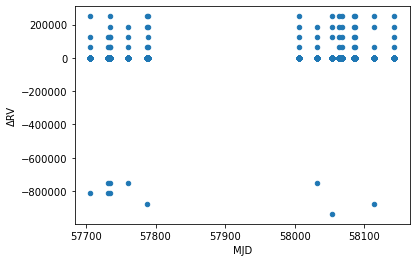

In [18]:
# Initial plot - lots of unexpected outliers?

df.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter')

## Questions
- What is causing the weird outliers?
- What should be done about them?

## Step 2
- Adjust plot, check for visible pattern
- If no pattern, try PCA

In [19]:
# Check ΔRV values

df.sort_values(['ΔRV'], ascending=True)

,Target ID,MJD,OBSVHELIO (km/s),Avg RV,ΔRV
841,apo25m.5226.150-08-RV.2M03294546+4531510,58054,999999.0,62470.779686,-937528.220314
1566,apo25m.5226.150-08-RV.2M03320675+4519114,58114,999999.0,125012.080229,-874986.919771
1557,apo25m.5226.150-08-RV.2M03320675+4519114,57788,999999.0,125012.080229,-874986.919771
2129,apo25m.5226.150-08-RV.2M03340241+4638066,57732,999999.0,187490.120951,-812508.879049
2128,apo25m.5226.150-08-RV.2M03340241+4638066,57706,999999.0,187490.120951,-812508.879049
...,...,...,...,...,...
1053,apo25m.5226.150-08-RV.2M03302697+4703478,58087,0.0,250004.225714,250004.225714
1052,apo25m.5226.150-08-RV.2M03302697+4703478,58085,0.0,250004.225714,250004.225714
1051,apo25m.5226.150-08-RV.2M03302697+4703478,58068,0.0,250004.225714,250004.225714
1049,apo25m.5226.150-08-RV.2M03302697+4703478,58054,0.0,250004.225714,250004.225714


In [20]:
# Show bad values

df[df['Avg RV'] > 100]

,Target ID,MJD,OBSVHELIO (km/s),Avg RV,ΔRV
841,apo25m.5226.150-08-RV.2M03294546+4531510,58054,999999.000000,62470.779686,-937528.220314
846,apo25m.5226.150-08-RV.2M03294546+4531510,58114,-34.726265,62470.779686,62436.053421
845,apo25m.5226.150-08-RV.2M03294546+4531510,58087,-49.396343,62470.779686,62421.383343
844,apo25m.5226.150-08-RV.2M03294546+4531510,58085,-33.324802,62470.779686,62437.454884
843,apo25m.5226.150-08-RV.2M03294546+4531510,58068,-4.026879,62470.779686,62466.752807
...,...,...,...,...,...
2130,apo25m.5226.150-08-RV.2M03340241+4638066,57734,999999.000000,187490.120951,-812508.879049
2135,apo25m.5226.150-08-RV.2M03340241+4638066,58006,-12.611349,187490.120951,187477.509602
2132,apo25m.5226.150-08-RV.2M03340241+4638066,57760,-9.671673,187490.120951,187480.449278
2133,apo25m.5226.150-08-RV.2M03340241+4638066,57788,-10.598166,187490.120951,187479.522785


In [21]:
# Drop bad values

df_cutoff = df[df['Avg RV'] < 100]
df_cutoff.sort_values(['Avg RV'], ascending=False)

,Target ID,MJD,OBSVHELIO (km/s),Avg RV,ΔRV
1143,apo25m.5226.150-08-RV.2M03303764+4658476,58006,69.291336,69.298957,0.007621
1151,apo25m.5226.150-08-RV.2M03303764+4658476,58143,69.407870,69.298957,-0.108913
1147,apo25m.5226.150-08-RV.2M03303764+4658476,58068,69.426580,69.298957,-0.127623
1146,apo25m.5226.150-08-RV.2M03303764+4658476,58063,69.468094,69.298957,-0.169137
1145,apo25m.5226.150-08-RV.2M03303764+4658476,58054,69.230255,69.298957,0.068702
...,...,...,...,...,...
395,apo25m.5226.150-08-RV.2M03281525+4636079,58068,-104.073670,-104.032626,-0.041044
396,apo25m.5226.150-08-RV.2M03281525+4636079,58085,-104.152390,-104.032626,-0.119764
397,apo25m.5226.150-08-RV.2M03281525+4636079,58087,-103.987430,-104.032626,0.045196
393,apo25m.5226.150-08-RV.2M03281525+4636079,58054,-103.938790,-104.032626,0.093836


<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

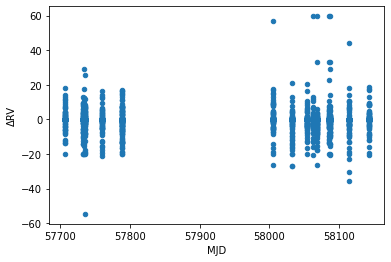

In [22]:
# New plot with only good values

df_cutoff.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter') #, figsize=(15, 15))

In [23]:
df_cutoff1 = df_cutoff.loc[(df_cutoff['ΔRV'] < 0.5) & (df_cutoff['ΔRV'] > -0.5)]

<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

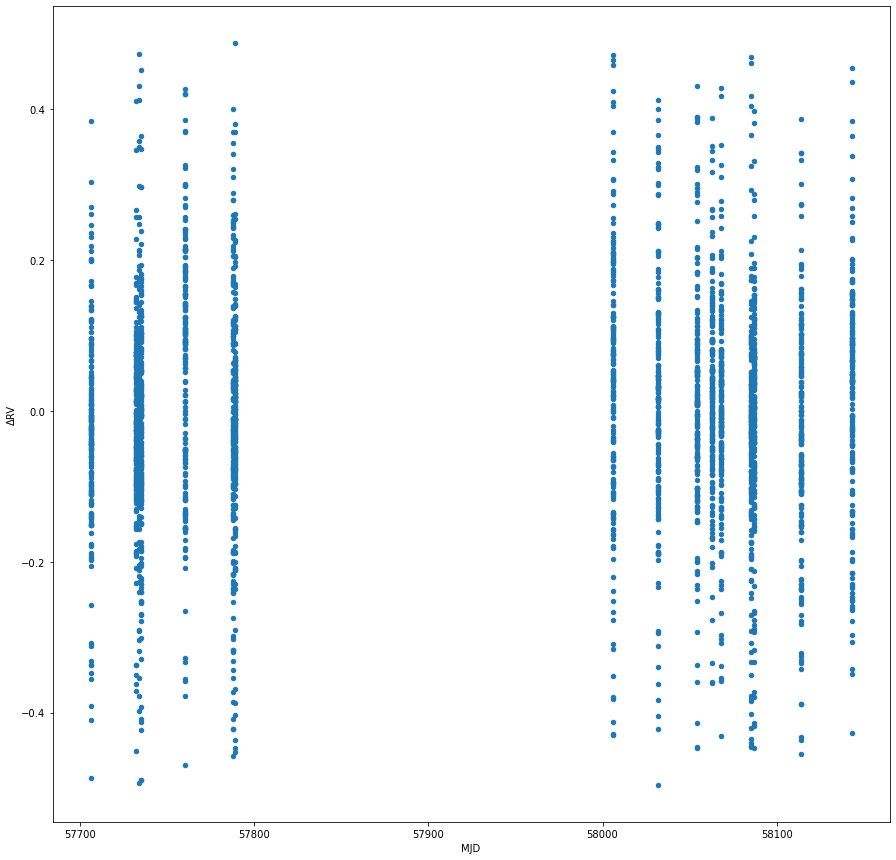

In [24]:
df_cutoff1.plot(x='MJD', y='ΔRV', kind='scatter', figsize=(15,15))

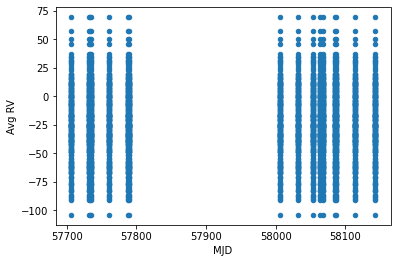

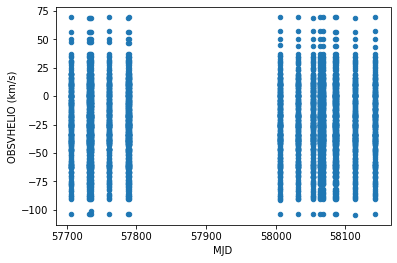

In [25]:
# Plots of avg RVs and all RVs

rv_avg_plot = df_cutoff.plot(x = 'MJD', y = 'Avg RV', kind = 'scatter')
rv_all_plot = df_cutoff.plot(x = 'MJD', y = 'OBSVHELIO (km/s)', kind = 'scatter')

In [26]:
df_test = df[df['Target ID'] == 'apo25m.5226.150-08-RV.2M03252400+4614203']

In [27]:
df_test

,Target ID,MJD,OBSVHELIO (km/s),Avg RV,ΔRV
0,apo25m.5226.150-08-RV.2M03252400+4614203,57706,-86.565704,-86.460343,-0.105361
15,apo25m.5226.150-08-RV.2M03252400+4614203,58143,-86.096080,-86.460343,0.364263
14,apo25m.5226.150-08-RV.2M03252400+4614203,58114,-86.530830,-86.460343,-0.070487
13,apo25m.5226.150-08-RV.2M03252400+4614203,58087,-86.532440,-86.460343,-0.072097
12,apo25m.5226.150-08-RV.2M03252400+4614203,58085,-86.569565,-86.460343,-0.109222
10,apo25m.5226.150-08-RV.2M03252400+4614203,58063,-86.519880,-86.460343,-0.059537
9,apo25m.5226.150-08-RV.2M03252400+4614203,58054,-86.564070,-86.460343,-0.103727
8,apo25m.5226.150-08-RV.2M03252400+4614203,58032,-86.379560,-86.460343,0.080783
11,apo25m.5226.150-08-RV.2M03252400+4614203,58068,-86.524210,-86.460343,-0.063867
6,apo25m.5226.150-08-RV.2M03252400+4614203,57789,-86.457430,-86.460343,0.002913


<AxesSubplot:xlabel='MJD', ylabel='ΔRV'>

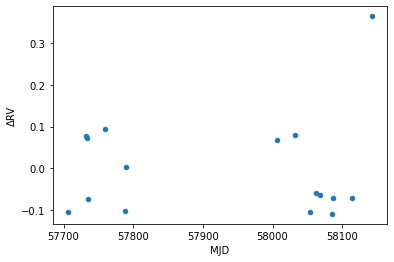

In [28]:
df_test.plot(x = 'MJD', y = 'ΔRV', kind = 'scatter')

### Try PCA

In [29]:
features = ['MJD', 'ΔRV']

In [30]:
x2 = df.loc[:, features].values

In [31]:
y2 = df.loc[:, ['Target ID']].values

In [32]:
x2 = StandardScaler().fit_transform(x2)

In [33]:
x2.shape

(3632, 2)

In [34]:
# Check standard dev is 1.0

np.mean(x2), np.std(x2)

(1.5883323015861432e-18, 1.0)

In [35]:
feat_cols = ['feature'+str(i) for i in range(x2.shape[1])]

In [36]:
normalised_data = pd.DataFrame(x2,columns=feat_cols)

In [37]:
normalised_data.tail()

,feature0,feature1
3627,-1.212567,0.000014
3628,-1.370993,0.000009
3629,1.115074,0.000012
3630,-0.865249,0.000013
3631,1.291780,0.000016


In [38]:
pca = PCA(n_components = 2)

In [39]:
principalComponents = pca.fit_transform(x2)

In [40]:
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2'])

In [41]:
principalDf.tail()

,principal component 1,principal component 2
3627,0.857405,-0.857424
3628,0.969432,-0.969445
3629,-0.788485,0.788468
3630,0.611814,-0.611832
3631,-0.913437,0.913415


In [42]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.51636992 0.48363008]


<Figure size 432x288 with 0 Axes>

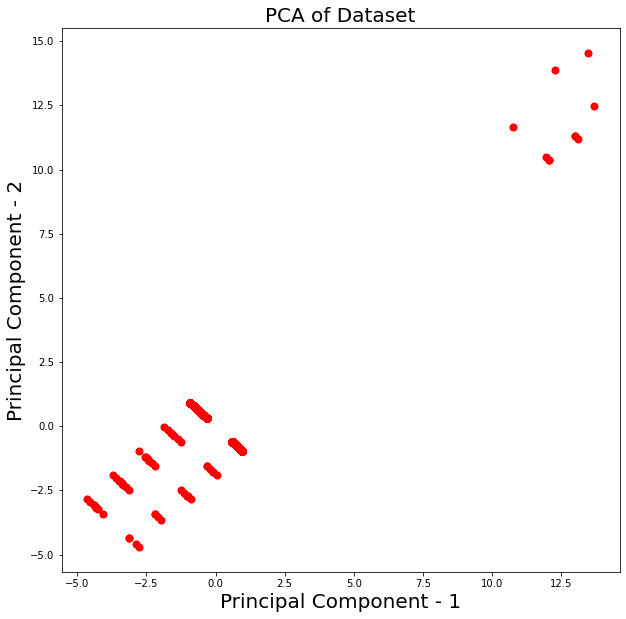

In [43]:
plt.figure()
plt.figure(figsize=(10,10))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("PCA of Dataset",fontsize=20)
targets = [df['Target ID']]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['Target ID'] == target
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

# plt.legend(targets,prop={'size': 15})

In [165]:
finalDf = pd.concat([principalDf, df[['Target ID']]], axis = 1)

In [166]:
finalDf

,principal component 1,principal component 2,Target ID
0,-0.018731,-1.022855,apo25m.5226.150-08-RV.2M03252400+4614203
1,-0.025336,-0.914397,apo25m.5226.150-08-RV.2M03252400+4614203
2,-0.025844,-0.906054,apo25m.5226.150-08-RV.2M03252400+4614203
3,-0.026098,-0.901884,apo25m.5226.150-08-RV.2M03252400+4614203
4,-0.032449,-0.797598,apo25m.5226.150-08-RV.2M03252400+4614203
...,...,...,...
3627,-0.109078,0.488988,apo25m.5226.150-08-RV.2M03415658+4626067
3628,-0.113397,0.559901,apo25m.5226.150-08-RV.2M03415658+4626067
3629,-0.113905,0.568244,apo25m.5226.150-08-RV.2M03415658+4626067
3630,-0.120764,0.680872,apo25m.5226.150-08-RV.2M03415658+4626067
